https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob

In [3]:
d1_real_dir = r"C:\Users\HP\Desktop\Semester II\AI and ML Laboratory\Dataset\Dataset_Signature_Final\Dataset\dataset1\real"
d1_forge_dir = r"C:\Users\HP\Desktop\Semester II\AI and ML Laboratory\Dataset\Dataset_Signature_Final\Dataset\dataset1\forge"

In [4]:
SIZE = 224

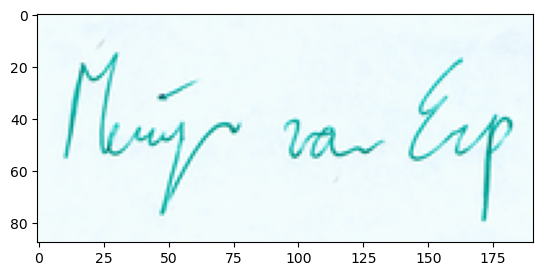

In [5]:
# Show one authorized signature image
img1 = plt.imread(r"C:\Users\HP\Desktop\Semester II\AI and ML Laboratory\Dataset\Dataset_Signature_Final\Dataset\dataset1\real\00100001.png")
plt.imshow(img1)

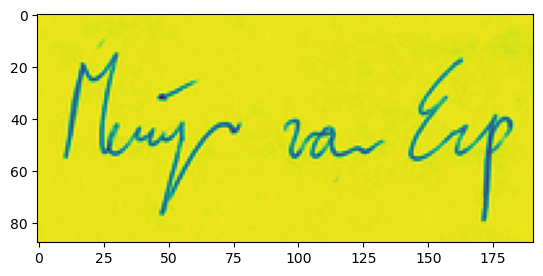

In [6]:
img1 = cv2.imread(r"C:\Users\HP\Desktop\Semester II\AI and ML Laboratory\Dataset\Dataset_Signature_Final\Dataset\dataset1\real\00100001.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1)
plt.show()

In [7]:
# blur
blur = cv2.GaussianBlur(img1, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(img1, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

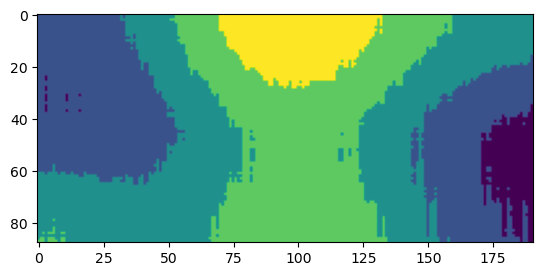

In [8]:
plt.imshow(blur)
plt.show()

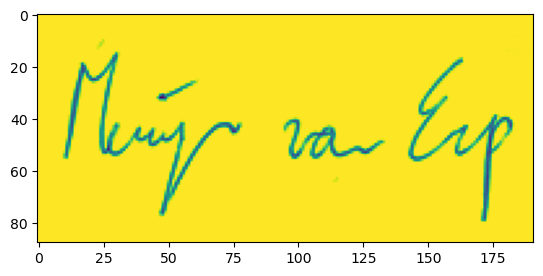

In [9]:
plt.imshow(divide)
plt.show()

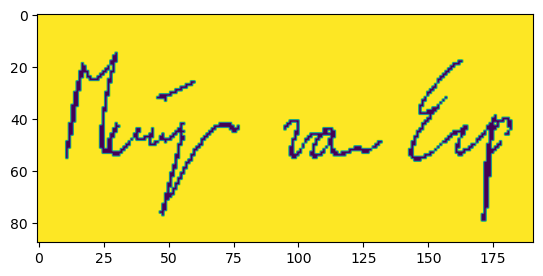

In [10]:
plt.imshow(thresh)
plt.show()

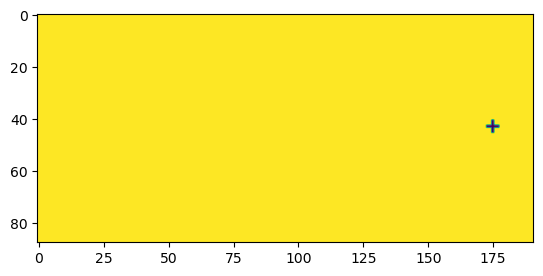

In [11]:
plt.imshow(morph)
plt.show()

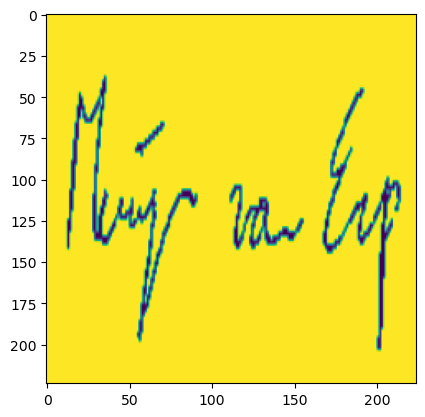

In [14]:
thresh = cv2.resize(thresh, (SIZE, SIZE))
plt.imshow(thresh)
plt.show()

In [ ]:
# Show one forged signature image
img2 = plt.imread(r"C:\Users\HP\Desktop\Semester II\AI and ML Laboratory\Dataset\Dataset_Signature_Final\Dataset\dataset1\forge\02100001.png")
plt.imshow(img2)

In [ ]:
for per in os.listdir(d1_real_dir):
    for data in glob.glob()

In [ ]:
import cv2
import numpy as np
from scipy.spatial.distance import cosine
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load VGG16 model pre-trained on ImageNet dataset
model = VGG16(weights='imagenet', include_top=False)

# Extract bottleneck features from the last pooling layer of the VGG16 network
def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    features = features.flatten()
    return features

# Compute feature similarity using cosine distance
def similarity(feature1, feature2):
    return 1 - cosine(feature1, feature2)

# Calculate dynamic threshold value for training module
def calculate_threshold(features):
    variations = []
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            similarity_score = similarity(features[i], features[j])
            if similarity_score > 0.9: # consider only highly similar signatures
                variations.append(abs(features[i] - features[j]))
    threshold = np.median(variations)
    return threshold

# Train the model with authorized signature images
def train(authorized_signatures):
    features = []
    for signature in authorized_signatures:
        feature = extract_features(signature)
        features.append(feature)
    threshold = calculate_threshold(features)
    return threshold

# Verify the signature using trained model
def verify(signature, authorized_signatures, threshold):
    feature = extract_features(signature)
    similarity_scores = []
    for authorized_signature in authorized_signatures:
        authorized_feature = extract_features(authorized_signature)
        similarity_score = similarity(feature, authorized_feature)
        similarity_scores.append(similarity_score)
    avg_similarity = np.mean(similarity_scores)
    if avg_similarity >= threshold:
        return 'MATCHED'
    else:
        return 'NOT MATCHED'

# Example usage for training module
authorized_signatures = ['signature1.jpg', 'signature2.jpg', 'signature3.jpg']
threshold = train(authorized_signatures)
print('Threshold:', threshold)

# Example usage for inference module
signature = 'questioned_signature.jpg'
authorized_signatures = ['signature1.jpg', 'signature2.jpg', 'signature3.jpg']
result = verify(signature, authorized_signatures, threshold)
print('Result:', result)